<a href="https://colab.research.google.com/github/eejyoo/2022-2-ML/blob/main/ML_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀

- 데이터를 가장 잘 설명하는 모델을 찾아 입력값에 따른 미래 결과값을 예측하는 알고리즘
- 예
 - 데이터: 과거 평균 기온(X)과 그에 따른 아이스크림 판매량(Y)
 - 가정: 평균 기온과 판매량은 선형적인 관계를 가지고 있음.
 - 목표: 평균 기온에 따른 아이스크림 판매량 예측하기

 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
 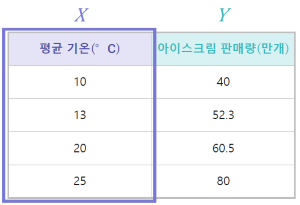
 &nbsp;&nbsp;
 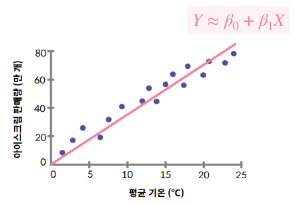

(1) 단순 선형 회귀란?
 - 데이터를 설명하는 모델을 직선 형태로 가정
 - 가정: y = B0 + B1X
 - 직선을 구성하는 y절편과 기울기를 구해야 함

# 라이브러리, 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('')

# EDA

In [ ]:
# 초기 데이터 5개


about dataset
- age: 나이
- sex: 성별(female, male)
- bmi: Body mass index, 신체에 대한 이해를 제공하며 키에 비해 상대적으로 높거나 낮은 체중, 키에 대한 체중 비율을 이용한 체중(kg/m ^ 2)의 객관적 지수(이상적으로는 18.5-24.9)
- children: 건강보험 적용 아동 수, 부양가족 수
- smoker: 흡연여부(yes, no)
- region: 지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 청구하는 개별 의료비

In [ ]:
# 정보


In [ ]:
# 통계 자료


In [ ]:
import seaborn as sns

In [ ]:
# 나이별 인원수
sns.histplot(data = df, x = 'age', bins = 'auto')

In [ ]:
# 나이와 의료비의 관계
plt.figure( figsize = (15,10))
sns.lineplot()

In [ ]:
# 흡연여부도 고려한 나이와 의료비의 관계
plt.figure(figsize=(8,8))
sns.scatterplot()
plt.title('Age vs Charges (smoker yes/no)')
plt.plot()

In [ ]:
# 흡연여부 데이터 수


In [ ]:
# 의료비가 15000 미만인 데이터만 대상으로 함
# https://yganalyst.github.io/data_handling/memo_5/
data =
x = data['age'].values
x = np.reshape(x, (-1,1))
y = data['charges'].values
y = np.reshape(y,(-1,1))

In [ ]:
plt.scatter(x,y,color='blue')
plt.xlabel ('age')
plt.ylabel ('charges amount')
plt.title('Scatter plot of Charges vs age')
plt.plot

# Linear Regression(선형 회귀)

In [ ]:
# 라이브러리 가져오고 데이터 나누기(train, test)


x_train,x_test,y_train,y_test=


In [ ]:
# 객체 만들고 훈련시키기


In [ ]:
# 예측하기
prediction = 

In [ ]:
# 정확도 구하기 - 과대적합/과소적합


In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,prediction,color='blue')
plt.xlabel ('age')
plt.ylabel ('charges amount')
plt.title('Scatter plot of Charges vs age')

# 결론
- 나이와 의료비의 관계가 정비례 관계임.
- 환자 연령이 50세 이상인 경우 나이가 상승함에 따라 더욱 금액이 상승함.

(2) 다중 선형 회귀란?

# 다중 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# 문자 카테고리를 숫자로 변환

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [ ]:
# 숫자로 변환된 데이터확인


In [ ]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression()
lr.fit()

y_train_pred = 
y_test_pred = 

# 정확도 확인


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)



# 회귀 평가 지표
 - 목표를 얼마나 잘 달성했는지 정도를 평가해야 함.
 - 실제 값과 모델이 예측하는 값의 차이에 기반한 평가 방법 사용
 - 예시: RSS, MSE, MAE, MAPE, R^2
 <br><br>
 (1) RSS - 단순 오차
  - 실제 값과 예측 값의 단순 오차 제곱의 합
  - 값이 작을수록 모델의 성능이 높음
  - 전체 데이터에 대한 실제 값과 예측하는 값의 오차 제곱의 총합<br>

 (2) MSE(Mean Squared Error)
  - 평균 제곱 오차
  - RSS에서 데이터 수만큼 나눈 값
  - 값이 작을수록 모델의 성능이 높다고 평가.<br>

 (3) MAE(Mean Absolute Error)
  - 평균 절댓값 오차
  - 실제 값과 예측 값의 오차의 절대값의 평균
  - 값이 작을수록 모델의 성능이 높다고 평가.<br>

 (4) R^2(결정 계수)
  - 회귀 모델의 설명력을 표현하는 지표
  - 1에 가까울수록 높은 성능의 모델


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))